In [95]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# 查看数据
data_count=pd.read_csv('./食品销售数据集-销售明细表.csv')

data_store=pd.read_csv('./食品销售数据集-门店表.csv')

data_single=pd.read_csv('./食品销售数据集-销售目标表.csv')

In [97]:
data_store.head()

,id,store_name,area,province,city,province_code,city_code
0,AH001,安徽1号店,华东,安徽省,合肥市,340000,340100.0
1,AH002,安徽2号店,华东,安徽省,芜湖市,340000,340200.0
2,AH003,安徽3号店,华东,安徽省,阜阳市,340000,341200.0
3,AH004,安徽4号店,华东,安徽省,宿州市,340000,341300.0
4,AH005,安徽5号店,华东,安徽省,安庆市,340000,340800.0


In [98]:
data_single.head()

,date,area,province,city,sales_target
0,1/1/2021 00:00:00,东北,黑龙江省,哈尔滨市,13000
1,1/2/2021 00:00:00,东北,黑龙江省,哈尔滨市,11000
2,1/3/2021 00:00:00,东北,黑龙江省,哈尔滨市,14000
3,1/4/2021 00:00:00,东北,黑龙江省,哈尔滨市,14000
4,1/5/2021 00:00:00,东北,黑龙江省,哈尔滨市,15000


In [99]:
data_count.head()

,date,order_id,store_id,user_id,pro_id,quantity,amount
0,5/4/2019 00:00:00,od_000001,SC013,cus_00001,pro_0001,2,576.00
1,10/8/2019 00:00:00,od_000002,HAIN007,cus_00002,pro_0002,1,29.50
2,7/6/2019 00:00:00,od_000003,JS007,cus_00003,pro_0003,1,2.49
3,12/12/2019 00:00:00,od_000004,HLJ005,cus_00004,pro_0004,4,1184.00
4,22/9/2019 00:00:00,od_000005,SD005,cus_00005,pro_0005,1,0.00


In [100]:
# 数据基本情况
data_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003872 entries, 0 to 1003871
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   date      1003872 non-null  object 
 1   order_id  1003872 non-null  object 
 2   store_id  1003872 non-null  object 
 3   user_id   1003872 non-null  object 
 4   pro_id    1003872 non-null  object 
 5   quantity  1003872 non-null  int64  
 6   amount    1003872 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 53.6+ MB


In [101]:
data_count.columns

Index(['date', 'order_id', 'store_id', 'user_id', 'pro_id', 'quantity',
       'amount'],
      dtype='object')

In [102]:
data_count['date'] = pd.to_datetime(data_count['date'], format="%d/%m/%Y %H:%M:%S", dayfirst=True)

In [103]:
data_count.head()

,date,order_id,store_id,user_id,pro_id,quantity,amount
0,2019-04-05,od_000001,SC013,cus_00001,pro_0001,2,576.00
1,2019-08-10,od_000002,HAIN007,cus_00002,pro_0002,1,29.50
2,2019-06-07,od_000003,JS007,cus_00003,pro_0003,1,2.49
3,2019-12-12,od_000004,HLJ005,cus_00004,pro_0004,4,1184.00
4,2019-09-22,od_000005,SD005,cus_00005,pro_0005,1,0.00


In [104]:
# 字段描述
data_count.describe()

,quantity,amount
count,1.003872e+06,1.003872e+06
mean,1.212818e+00,4.946559e+01
std,9.272480e-01,1.240613e+02
min,-4.800000e+01,-2.464000e+03
25%,1.000000e+00,1.280000e+01
50%,1.000000e+00,2.500000e+01
75%,1.000000e+00,3.990000e+01
max,1.080000e+02,2.368000e+03


In [105]:
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号
#忽略警告
import warnings
warnings.filterwarnings('ignore')

In [106]:
data_new_count =data_count.rename(columns={'store_id': 'id'})
print(data_new_count)

              date   order_id       id    user_id    pro_id  quantity   amount
0       2019-04-05  od_000001    SC013  cus_00001  pro_0001         2   576.00
1       2019-08-10  od_000002  HAIN007  cus_00002  pro_0002         1    29.50
2       2019-06-07  od_000003    JS007  cus_00003  pro_0003         1     2.49
3       2019-12-12  od_000004   HLJ005  cus_00004  pro_0004         4  1184.00
4       2019-09-22  od_000005    SD005  cus_00005  pro_0005         1     0.00
...            ...        ...      ...        ...       ...       ...      ...
1003867 2021-03-08  od_644618    SC002  cus_97156  pro_0001         3   811.20
1003868 2021-01-14  od_543679    SD011  cus_53874  pro_0802         1     5.00
1003869 2021-02-09  od_644619    GZ009  cus_93979  pro_0851         2    44.80
1003870 2021-03-25  od_644620    JL001  cus_93075  pro_0482         1     1.22
1003871 2021-05-19  od_644621    HB013  cus_95147  pro_0422         2    28.28

[1003872 rows x 7 columns]


In [107]:
data_no_zeros = data_single[data_single['sales_target'] != 0]
print(data_no_zeros)

                    date area province  city  sales_target
0      1/1/2021 00:00:00   东北     黑龙江省  哈尔滨市         13000
1      1/2/2021 00:00:00   东北     黑龙江省  哈尔滨市         11000
2      1/3/2021 00:00:00   东北     黑龙江省  哈尔滨市         14000
3      1/4/2021 00:00:00   东北     黑龙江省  哈尔滨市         14000
4      1/5/2021 00:00:00   东北     黑龙江省  哈尔滨市         15000
...                  ...  ...      ...   ...           ...
1639   1/8/2021 00:00:00   西南      重庆市   重庆市         19000
1640   1/9/2021 00:00:00   西南      重庆市   重庆市         18000
1641  1/10/2021 00:00:00   西南      重庆市   重庆市         17000
1642  1/11/2021 00:00:00   西南      重庆市   重庆市         17000
1643  1/12/2021 00:00:00   西南      重庆市   重庆市         17000

[1396 rows x 5 columns]


In [108]:
# 假设 df 是你的 DataFrame，包含 'date' 列
# 替换 'date' 为你实际的日期列名
data_new_count['date'] = pd.to_datetime(data_new_count['date'])  # 将日期列转换为 datetime 类型

# 提取 2021 年的数据
data_2021 = data_new_count[data_new_count['date'].dt.year == 2021]

# 输出 2021 年的数据
print(data_2021)


              date   order_id       id    user_id    pro_id  quantity  amount
14708   2021-05-15  od_012757  HAIN001  cus_01148  pro_0135         1    0.00
14709   2021-05-31  od_012758    ZJ003  cus_04654  pro_0447         1   15.39
14710   2021-01-04  od_012759   HUN001  cus_00911  pro_0727         1    0.00
14711   2021-05-26  od_012760   HLJ004  cus_03527  pro_0207         4   23.20
14730   2021-04-10  od_012774    SH006  cus_00918  pro_0306         1   50.00
...            ...        ...      ...        ...       ...       ...     ...
1003867 2021-03-08  od_644618    SC002  cus_97156  pro_0001         3  811.20
1003868 2021-01-14  od_543679    SD011  cus_53874  pro_0802         1    5.00
1003869 2021-02-09  od_644619    GZ009  cus_93979  pro_0851         2   44.80
1003870 2021-03-25  od_644620    JL001  cus_93075  pro_0482         1    1.22
1003871 2021-05-19  od_644621    HB013  cus_95147  pro_0422         2   28.28

[168228 rows x 7 columns]


In [109]:
# 合并两个 DataFrame，按照 'id' 列进行合并
merged_data = pd.merge(data_store, data_2021[['id', 'quantity', 'amount']], left_on='id', right_on='id', how='left')

# 输出合并后的 DataFrame
print(merged_data)


            id store_name area province city  province_code  city_code  \
0        AH001      安徽1号店   华东      安徽省  合肥市         340000   340100.0   
1        AH001      安徽1号店   华东      安徽省  合肥市         340000   340100.0   
2        AH001      安徽1号店   华东      安徽省  合肥市         340000   340100.0   
3        AH001      安徽1号店   华东      安徽省  合肥市         340000   340100.0   
4        AH001      安徽1号店   华东      安徽省  合肥市         340000   340100.0   
...        ...        ...  ...      ...  ...            ...        ...   
168281  HEN012     河南12号店   华中      河南省  洛阳市         410000   410300.0   
168282  HEN013     河南13号店   华中      河南省  郑州市         410000   410100.0   
168283  HEN014     河南14号店   华中      河南省  南阳市         410000   411300.0   
168284  HEN015     河南15号店   华中      河南省  新乡市         410000   410700.0   
168285  HEN016     河南16号店   华中      河南省  信阳市         410000   411500.0   

        quantity  amount  
0            2.0    6.00  
1            1.0   13.80  
2            1.0    7.90  
3  

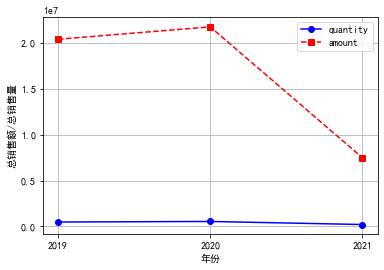

In [110]:
# 将date字段转换为日期类型
data_count['date'] = pd.to_datetime(data_count['date'])

# 根据年份分组，并计算quantity和amount的总和
grouped_data = data_count.groupby(data_count['date'].dt.year).agg({'quantity': 'sum', 'amount': 'sum'})

# 选择2019年、2020年和2021年的数据
grouped_data = grouped_data.loc[[2019, 2020, 2021]]

# 绘制折线图
plt.plot(grouped_data.index, grouped_data['quantity'], marker='o', linestyle='-', color='b', label='quantity')
plt.plot(grouped_data.index, grouped_data['amount'], marker='s', linestyle='--', color='r', label='amount')

# 设置图例和坐标轴标签
plt.legend()
plt.xlabel('年份')
plt.ylabel('总销售额/总销售量')

# 设置x轴刻度
plt.xticks([2019, 2020, 2021])

# 显示网格线
plt.grid(True)

# 显示图像
plt.show()


In [111]:
result_area = merged_data.groupby('area')[['quantity', 'amount']].sum().reset_index()

In [112]:
result0 = merged_data.groupby('city')[['quantity', 'amount']].sum().reset_index()

In [113]:
result_provice = merged_data.groupby('province')[['quantity', 'amount']].sum().reset_index()

In [114]:
result1 = data_no_zeros.groupby('city')['sales_target'].sum().reset_index()

# 如果你想要查看合并后的结果
print(result1)


      city  sales_target
0      三亚市        610000
1      上海市        781000
2      上饶市         70000
3      东方市        122000
4      临汾市         81000
..     ...           ...
112    黄冈市         70000
113   黔东南州        100000
114    黔南州        211000
115   黔西南州         37000
116  齐齐哈尔市        190000

[117 rows x 2 columns]


In [115]:
result_province_single = data_no_zeros.groupby('province')['sales_target'].sum().reset_index()

# 如果你想要查看合并后的结果
print(result_province_single)


   province  sales_target
0       上海市        781000
1       云南省        762000
2       北京市       1150000
3       吉林省       1237000
4       四川省       1114000
5       天津市       1090000
6       安徽省        659000
7       山东省        986000
8       山西省        996000
9       广东省       1120000
10      江苏省       1911000
11      江西省        561000
12      河北省       2197000
13      河南省        539000
14      浙江省        745000
15      海南省        899000
16      湖北省        491000
17      湖南省        318000
18      甘肃省       1578000
19      福建省        639000
20      贵州省        466000
21      辽宁省        733000
22      重庆市        201000
23      陕西省        816000
24      青海省       1440000
25     黑龙江省        571000


In [116]:
result_area_single = data_no_zeros.groupby('area')['sales_target'].sum().reset_index()

# 如果你想要查看合并后的结果
print(result_area_single)


  area  sales_target
0   东北       2541000
1   华东       6282000
2   华中       1348000
3   华北       5433000
4   华南       2019000
5   西北       3834000
6   西南       2543000


In [117]:
# 假设 df1 和 df2 是两个 DataFrame，有一个相同的 'id' 列
# df1 包含其他列，df2 包含需要添加的两列数据 'column1' 和 'column2'

# 合并两个 DataFrame，按照 'id' 列进行合并
merged_data_new = pd.merge(result0, result1[['city', 'sales_target']], on='city', how='left')

# 输出合并后的 DataFrame
print(merged_data_new)


      city  quantity     amount  sales_target
0      三亚市    5715.0  195375.55      610000.0
1      上海市    6051.0  237841.16      781000.0
2      上饶市     846.0   29834.88       70000.0
3      东方市     841.0   30945.06      122000.0
4      东莞市      17.0     292.80           NaN
..     ...       ...        ...           ...
131    黄冈市    1293.0   40815.04       70000.0
132   黔东南州    1014.0   40216.79      100000.0
133    黔南州    2013.0   71108.85      211000.0
134   黔西南州     823.0   28942.63       37000.0
135  齐齐哈尔市    1806.0   53597.34      190000.0

[136 rows x 4 columns]


In [118]:
# 假设 df 是你的 DataFrame，包含需要处理的列 'column_name'
# 请替换 'column_name' 为你实际的列名

# 删除包含缺失值的行
merged_data_new_list = merged_data_new.dropna(subset=['sales_target'])

# 输出处理后的 DataFrame
print(merged_data_new_list)


      city  quantity     amount  sales_target
0      三亚市    5715.0  195375.55      610000.0
1      上海市    6051.0  237841.16      781000.0
2      上饶市     846.0   29834.88       70000.0
3      东方市     841.0   30945.06      122000.0
6      临汾市     678.0   34743.84       81000.0
..     ...       ...        ...           ...
131    黄冈市    1293.0   40815.04       70000.0
132   黔东南州    1014.0   40216.79      100000.0
133    黔南州    2013.0   71108.85      211000.0
134   黔西南州     823.0   28942.63       37000.0
135  齐齐哈尔市    1806.0   53597.34      190000.0

[117 rows x 4 columns]


In [119]:
# 假设 df1 和 df2 是两个 DataFrame，有一个相同的 'id' 列
# df1 包含其他列，df2 包含需要添加的两列数据 'column1' 和 'column2'

# 合并两个 DataFrame，按照 'id' 列进行合并
merged_area_new = pd.merge(result_area, result_area_single[['area', 'sales_target']], on='area', how='left')

# 输出合并后的 DataFrame
print(merged_area_new)



  area  quantity      amount  sales_target
0   东北   20102.0   767502.30       2541000
1   华东   50584.0  1812065.25       6282000
2   华中   12516.0   482347.78       1348000
3   华北   48593.0  1756890.02       5433000
4   华南   17013.0   658831.58       2019000
5   西北   30725.0  1142067.32       3834000
6   西南   24235.0   870045.21       2543000


In [120]:
# 假设 df1 和 df2 是两个 DataFrame，有一个相同的 'id' 列
# df1 包含其他列，df2 包含需要添加的两列数据 'column1' 和 'column2'

# 合并两个 DataFrame，按照 'id' 列进行合并
merged_data_new_2 = pd.merge(result_provice, result_province_single[['province', 'sales_target']], on='province', how='left')

# 输出合并后的 DataFrame
print(merged_data_new_2)


   province  quantity     amount  sales_target
0       上海市    6051.0  237841.16        781000
1       云南省    9741.0  345380.63        762000
2       北京市    8993.0  352563.37       1150000
3       吉林省    9161.0  374431.24       1237000
4       四川省    8570.0  313076.67       1114000
5       天津市    8902.0  353912.68       1090000
6       安徽省    6566.0  232735.36        659000
7       山东省   11002.0  366634.35        986000
8       山西省    6870.0  290273.98        996000
9       广东省    9100.0  353711.14       1120000
10      江苏省   13084.0  479285.78       1911000
11      江西省    5519.0  194139.69        561000
12      河北省   23828.0  760139.99       2197000
13      河南省    5496.0  210769.03        539000
14      浙江省    2210.0   83220.22        745000
15      海南省    7913.0  305120.44        899000
16      湖北省    4139.0  162309.98        491000
17      湖南省    2881.0  109268.77        318000
18      甘肃省   13276.0  493367.17       1578000
19      福建省    6152.0  218208.69        639000
20      贵州省  

In [121]:
# 假设你有两列数据 'column1' 和 'column2'，计算它们的差值
merged_data_new['difference'] = merged_data_new['amount'] - merged_data_new['sales_target']
# 输出结果
print("差值结果:")
print(merged_data_new)


差值结果:
      city  quantity     amount  sales_target  difference
0      三亚市    5715.0  195375.55      610000.0  -414624.45
1      上海市    6051.0  237841.16      781000.0  -543158.84
2      上饶市     846.0   29834.88       70000.0   -40165.12
3      东方市     841.0   30945.06      122000.0   -91054.94
4      东莞市      17.0     292.80           NaN         NaN
..     ...       ...        ...           ...         ...
131    黄冈市    1293.0   40815.04       70000.0   -29184.96
132   黔东南州    1014.0   40216.79      100000.0   -59783.21
133    黔南州    2013.0   71108.85      211000.0  -139891.15
134   黔西南州     823.0   28942.63       37000.0    -8057.37
135  齐齐哈尔市    1806.0   53597.34      190000.0  -136402.66

[136 rows x 5 columns]


In [122]:
# 假设你有两列数据 'column1' 和 'column2'，计算它们的差值
merged_data_new_2['difference'] = merged_data_new_2['amount'] - merged_data_new_2['sales_target']

# 输出结果
print("差值结果:")
print(merged_data_new_2)


差值结果:
   province  quantity     amount  sales_target  difference
0       上海市    6051.0  237841.16        781000  -543158.84
1       云南省    9741.0  345380.63        762000  -416619.37
2       北京市    8993.0  352563.37       1150000  -797436.63
3       吉林省    9161.0  374431.24       1237000  -862568.76
4       四川省    8570.0  313076.67       1114000  -800923.33
5       天津市    8902.0  353912.68       1090000  -736087.32
6       安徽省    6566.0  232735.36        659000  -426264.64
7       山东省   11002.0  366634.35        986000  -619365.65
8       山西省    6870.0  290273.98        996000  -705726.02
9       广东省    9100.0  353711.14       1120000  -766288.86
10      江苏省   13084.0  479285.78       1911000 -1431714.22
11      江西省    5519.0  194139.69        561000  -366860.31
12      河北省   23828.0  760139.99       2197000 -1436860.01
13      河南省    5496.0  210769.03        539000  -328230.97
14      浙江省    2210.0   83220.22        745000  -661779.78
15      海南省    7913.0  305120.44        899000  -5

In [123]:
# 假设你有两列数据 'column1' 和 'column2'，计算它们的差值
merged_area_new['difference'] = merged_area_new['amount'] - merged_area_new['sales_target']

# 输出结果
print("差值结果:")
print(merged_area_new)


差值结果:
  area  quantity      amount  sales_target  difference
0   东北   20102.0   767502.30       2541000 -1773497.70
1   华东   50584.0  1812065.25       6282000 -4469934.75
2   华中   12516.0   482347.78       1348000  -865652.22
3   华北   48593.0  1756890.02       5433000 -3676109.98
4   华南   17013.0   658831.58       2019000 -1360168.42
5   西北   30725.0  1142067.32       3834000 -2691932.68
6   西南   24235.0   870045.21       2543000 -1672954.79


In [124]:

# 统计大于零和小于零的个数
count_greater_than_zero = (merged_data_new['difference'] > 0).sum()
count_less_than_zero = (merged_data_new['difference'] < 0).sum()

# 输出大于零和小于零的个数
print(f"大于零的个数: {count_greater_than_zero}")
print(f"小于零的个数: {count_less_than_zero}")

# 输出小于零的行的全部信息
rows_less_than_zero = merged_data_new[merged_data_new['difference'] < 0]
print("小于零的行的全部信息:")
print(rows_less_than_zero)


大于零的个数: 1
小于零的个数: 116
小于零的行的全部信息:
      city  quantity     amount  sales_target  difference
0      三亚市    5715.0  195375.55      610000.0  -414624.45
1      上海市    6051.0  237841.16      781000.0  -543158.84
2      上饶市     846.0   29834.88       70000.0   -40165.12
3      东方市     841.0   30945.06      122000.0   -91054.94
6      临汾市     678.0   34743.84       81000.0   -46256.16
..     ...       ...        ...           ...         ...
131    黄冈市    1293.0   40815.04       70000.0   -29184.96
132   黔东南州    1014.0   40216.79      100000.0   -59783.21
133    黔南州    2013.0   71108.85      211000.0  -139891.15
134   黔西南州     823.0   28942.63       37000.0    -8057.37
135  齐齐哈尔市    1806.0   53597.34      190000.0  -136402.66

[116 rows x 5 columns]


In [125]:
# 统计大于零和小于零的个数
count_greater_than_zero = (merged_data_new_2['difference'] > 0).sum()
count_less_than_zero = (merged_data_new_2['difference'] < 0).sum()

# 输出大于零和小于零的个数
print(f"大于零的个数: {count_greater_than_zero}")
print(f"小于零的个数: {count_less_than_zero}")

# 输出小于零的行的全部信息
rows_less_than_zero = merged_data_new_2[merged_data_new_2['difference'] < 0]
print("小于零的行的全部信息:")
print(rows_less_than_zero)


大于零的个数: 0
小于零的个数: 26
小于零的行的全部信息:
   province  quantity     amount  sales_target  difference
0       上海市    6051.0  237841.16        781000  -543158.84
1       云南省    9741.0  345380.63        762000  -416619.37
2       北京市    8993.0  352563.37       1150000  -797436.63
3       吉林省    9161.0  374431.24       1237000  -862568.76
4       四川省    8570.0  313076.67       1114000  -800923.33
5       天津市    8902.0  353912.68       1090000  -736087.32
6       安徽省    6566.0  232735.36        659000  -426264.64
7       山东省   11002.0  366634.35        986000  -619365.65
8       山西省    6870.0  290273.98        996000  -705726.02
9       广东省    9100.0  353711.14       1120000  -766288.86
10      江苏省   13084.0  479285.78       1911000 -1431714.22
11      江西省    5519.0  194139.69        561000  -366860.31
12      河北省   23828.0  760139.99       2197000 -1436860.01
13      河南省    5496.0  210769.03        539000  -328230.97
14      浙江省    2210.0   83220.22        745000  -661779.78
15      海南省    7913.0  

In [126]:
# 统计大于零和小于零的个数
count_greater_than_zero = (merged_area_new['difference'] > 0).sum()
count_less_than_zero = (merged_area_new['difference'] < 0).sum()

# 输出大于零和小于零的个数
print(f"大于零的个数: {count_greater_than_zero}")
print(f"小于零的个数: {count_less_than_zero}")

# 输出小于零的行的全部信息
rows_less_than_zero = merged_area_new[merged_area_new['difference'] < 0]
print("小于零的行的全部信息:")
print(rows_less_than_zero)


大于零的个数: 0
小于零的个数: 7
小于零的行的全部信息:
  area  quantity      amount  sales_target  difference
0   东北   20102.0   767502.30       2541000 -1773497.70
1   华东   50584.0  1812065.25       6282000 -4469934.75
2   华中   12516.0   482347.78       1348000  -865652.22
3   华北   48593.0  1756890.02       5433000 -3676109.98
4   华南   17013.0   658831.58       2019000 -1360168.42
5   西北   30725.0  1142067.32       3834000 -2691932.68
6   西南   24235.0   870045.21       2543000 -1672954.79


In [127]:
print(data.columns)

Index(['date', 'order_id', 'store_id', 'user_id', 'pro_id', 'quantity',
       'amount', 'year'],
      dtype='object')


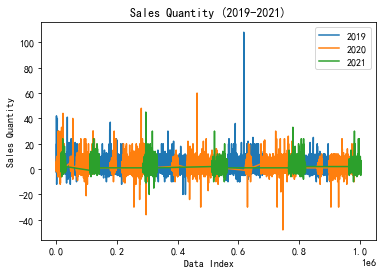

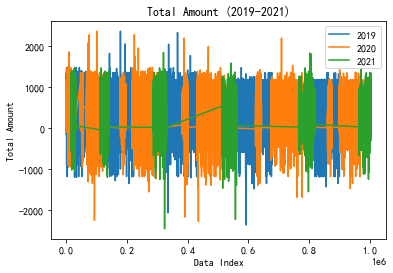

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('./食品销售数据集-销售明细表.csv')

# 提取年份
data['year'] = pd.to_datetime(data['date']).dt.year

# 绘制销售额的可视化图表
fig, ax = plt.subplots()
for year in data['year'].unique():
    year_data = data[data['year'] == year]
    ax.plot(year_data['quantity'], label=str(year))

ax.set_title('Sales Quantity (2019-2021)')
ax.set_xlabel('Data Index')
ax.set_ylabel('Sales Quantity')
ax.legend(loc='upper right')
plt.show()

# 绘制销售金额总和的可视化图表
fig, ax = plt.subplots()
for year in data['year'].unique():
    year_data = data[data['year'] == year]
    ax.plot(year_data['amount'], label=str(year))

ax.set_title('Total Amount (2019-2021)')
ax.set_xlabel('Data Index')
ax.set_ylabel('Total Amount')
ax.legend(loc='upper right')
plt.show()
